In [1]:
# important things are:
# Xtrain (image data)
# Ytrain_membrane (labels:  -1 ignore, 0 bg, 1 truth)
# Ytrain_synapse (labels: -1 ignore, 0 bg, 1 truth)
# Xtest (image data)
# Ytest_synapse (labels: 0 bg, 1 truth)
# Ytest_membrane (not available)

import ndio.remote.neurodata as ND
from time import time
import numpy as np

import matplotlib
matplotlib.use('TkAgg')

import pylab as plt
%matplotlib inline


tic = time()

# these are in xyz numpy arrays and may need to be transposed, depending on application

nd = ND()

# AC4
token = 'kasthuri11cc'
channel = 'image'
xstart, xstop = 4400,5424
ystart, ystop = 5440,6464
zstart, zstop = 1100,1200
res = 1

Xtrain = nd.get_cutout(token, channel, xstart, xstop, ystart, ystop, zstart, zstop, resolution=res)

annoToken = 'ac3ac4'
membraneTrainChannel = 'ac4membraneIDSIA' #no test available
synapseTrainChannel = 'ac4_synapse_truth'
synapseTestChannel = 'ac3_synapse_truth'
train_synapse = nd.get_cutout(annoToken, synapseTrainChannel, xstart, xstop, ystart, ystop, zstart, zstop, resolution=res)
train_membrane = nd.get_cutout(annoToken, membraneTrainChannel, xstart, xstop, ystart, ystop, zstart, zstop, resolution=res)


88.0
159.0


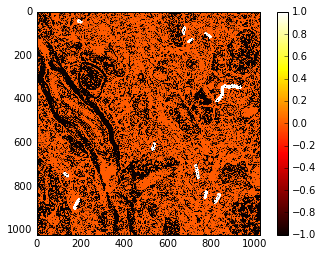

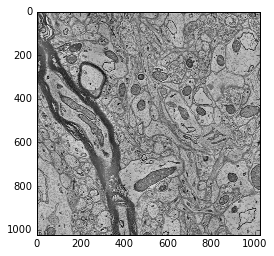

In [2]:
imvec = Xtrain[train_synapse > 0] 
Ytrain_synapse = np.zeros(np.shape(train_synapse),dtype='int8')
Ytrain_synapse[train_synapse > 0] = 1

lb = (np.percentile(imvec,10))
ub = (np.percentile(imvec,90))

print(lb)
print(ub)
Ytrain_synapse[(Xtrain < lb)] = -1
Ytrain_synapse[(Xtrain > ub)] = -1
plt.imshow(Ytrain_synapse[:,:,10],cmap='hot')
plt.colorbar()

plt.figure()
plt.imshow(Xtrain[:,:,10],cmap='gray')
plt.show()

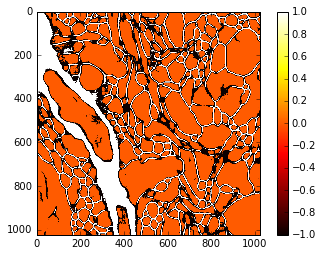

In [3]:
Ytrain_membrane = np.zeros(np.shape(train_membrane),dtype='int8')

Ytrain_membrane[(train_membrane < 0.5) & (train_membrane > 0.1)] = -1
Ytrain_membrane[train_membrane <= 0.1] = 0
Ytrain_membrane[train_membrane >= 0.5] = 1

plt.imshow(Ytrain_membrane[:,:,10],cmap='hot')
plt.colorbar()

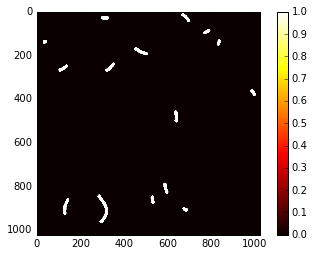

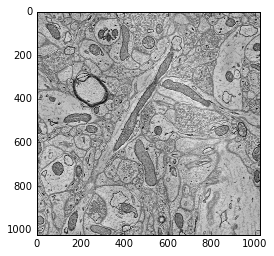

In [4]:
# AC3 (first 100 slices)
token = 'kasthuri11cc'
channel = 'image'
xstart, xstop = 5472, 6496
ystart, ystop = 8712, 9736
zstart, zstop = 1000, 1100
res = 1

Xtest = nd.get_cutout(token, channel, xstart, xstop, ystart, ystop, zstart, zstop, resolution=res)

Ytest_synapse = nd.get_cutout(annoToken, synapseTestChannel, xstart, xstop, ystart, ystop, zstart, zstop, resolution=res)
Ytest_synapse = np.asarray(Ytest_synapse > 0, dtype = 'int')

plt.imshow(Ytest_synapse[:,:,10],cmap='hot')
plt.colorbar()
plt.show()
plt.figure
plt.imshow(Xtest[:,:,10],cmap='gray')
plt.show()

In [6]:
np.savez_compressed('deep_learning_kasthuri_example_data.npz',Xtrain=Xtrain,Ytrain_membrane=Ytrain_membrane,
                    Ytrain_synapse=Ytrain_synapse,Xtest=Xtest, Ytest_synapse=Ytest_synapse)

In [7]:
print(time()-tic)

365.87209606170654
